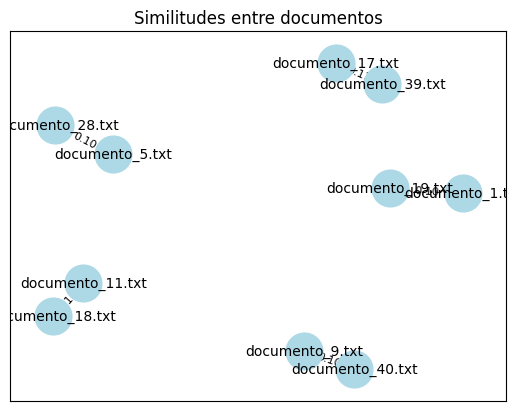

In [7]:
# Importar las bibliotecas necesarias
import networkx as nx
import matplotlib.pyplot as plt
import json


# Cargar las similitudes ordenadas desde el archivo JSON
ruta_resultados = '../resultados/similitudes_ordenadas.json'
with open(ruta_resultados, 'r', encoding='latin-1') as f:
    similitudes_ordenadas = json.load(f)


# Crear un grafo para representar las similitudes
def graficar_similitudes(similitudes, N):
    """
    Esta función crea un grafo para visualizar las similitudes entre documentos.
    - similitudes: lista de tuplas (doc1, doc2, similitud)
    - N: número de conexiones más importantes a mostrar
    """
    # Crear un grafo vacío
    G = nx.Graph()

    # Agregar nodos y aristas al grafo
    for doc1, doc2, similitud in similitudes[:N]:
        G.add_edge(doc1, doc2, weight=similitud)

    # Obtener las posiciones de los nodos para la visualización
    pos = nx.spring_layout(G)  # Layout para distribuir los nodos

    # Dibujar los nodos
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

    # Dibujar las aristas con pesos (similitudes)
    edges = G.edges(data=True)
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] * 2 for (_, _, d) in edges])

    # Dibujar las etiquetas de los nodos
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

    # Dibujar las etiquetas de las aristas (similitudes)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    # Mostrar el grafo
    plt.title("Similitudes entre documentos")
    plt.show()

# Llamar a la función para graficar las similitudes
N = 5  # Número de conexiones más importantes a mostrar
graficar_similitudes(similitudes_ordenadas, N)

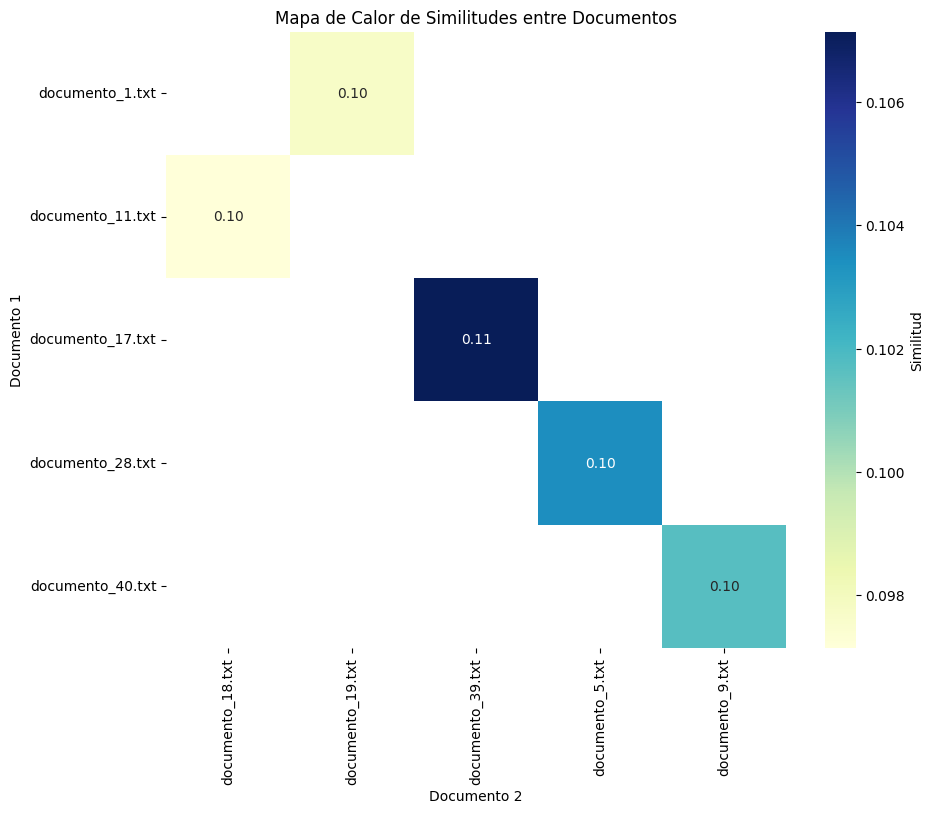

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear un heatmap para visualizar las similitudes
def graficar_heatmap(similitudes, N):
    """
    Esta función crea un heatmap para visualizar las similitudes entre documentos.
    - similitudes: lista de tuplas (doc1, doc2, similitud)
    - N: número de conexiones más importantes a mostrar
    """
    # Filtrar las N relaciones más importantes
    top_similitudes = similitudes[:N]

    # Crear un DataFrame para las similitudes
    data = pd.DataFrame(top_similitudes, columns=["Documento 1", "Documento 2", "Similitud"])

    # Crear una matriz de similitudes
    matriz = data.pivot(index="Documento 1", columns="Documento 2", values="Similitud")

    # Crear el heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(matriz, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Similitud'})
    plt.title("Mapa de Calor de Similitudes entre Documentos")
    plt.show()

# Llamar a la función para graficar el heatmap
N = 5  # Número de conexiones más importantes a mostrar
graficar_heatmap(similitudes_ordenadas, N)

